![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## Introdução

Este projeto analisa dados de criminalidade da cidade de Los Angeles com o objetivo de identificar padrões temporais que possam apoiar decisões estratégicas de segurança pública.

A análise foca em entender quando os crimes ocorrem com maior frequência, ajudando órgãos como o LAPD a otimizar a alocação de recursos.

## Objetivo

Explorar dados históricos de crimes em Los Angeles para identificar padrões de ocorrência ao longo do tempo, com foco em horários e períodos de maior incidência.

## Perguntas de Análise

- Qual é o horário com maior número de ocorrências criminais?
- Como os crimes se distribuem ao longo do dia?
- Existem períodos claramente mais críticos?

## Preparação dos Dados

Nesta etapa, os dados foram carregados e tratados para permitir a extração correta de informações temporais, especialmente o horário de ocorrência dos crimes.

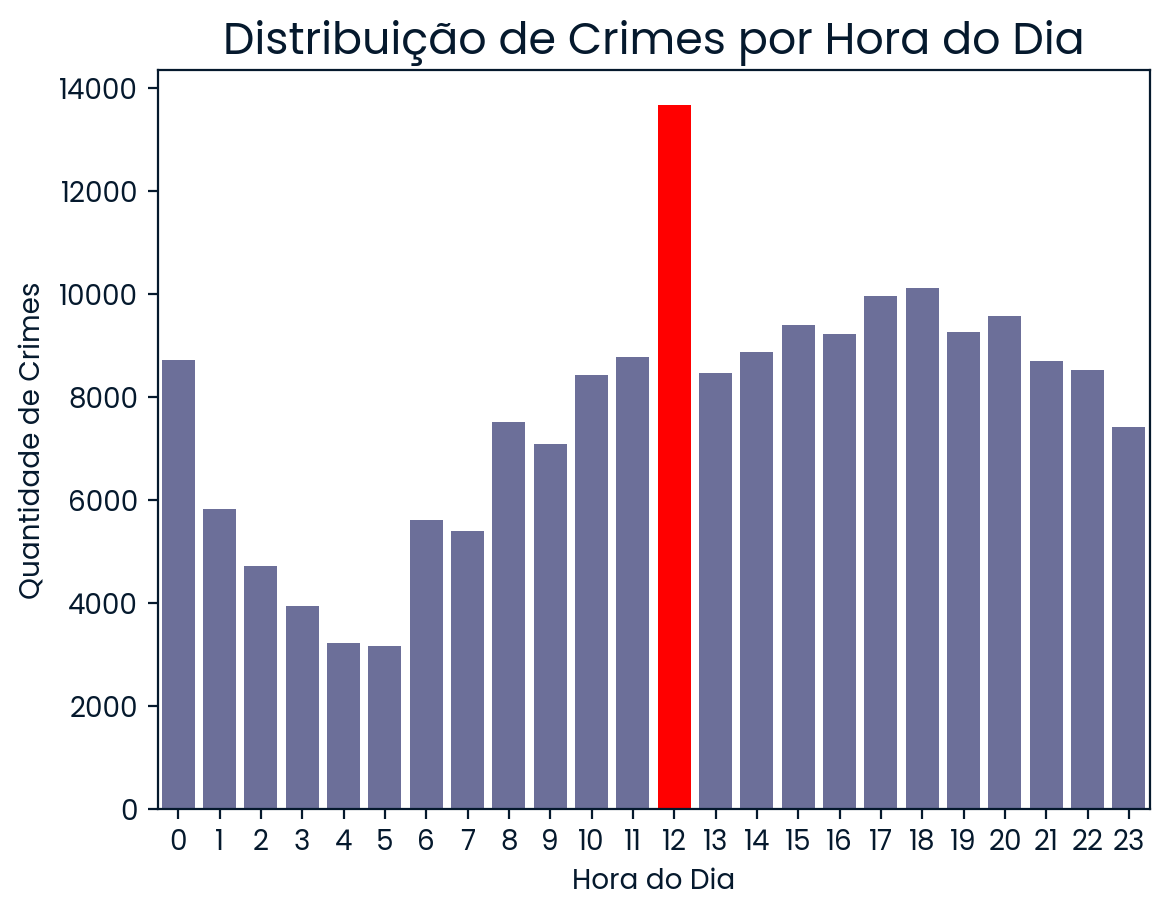

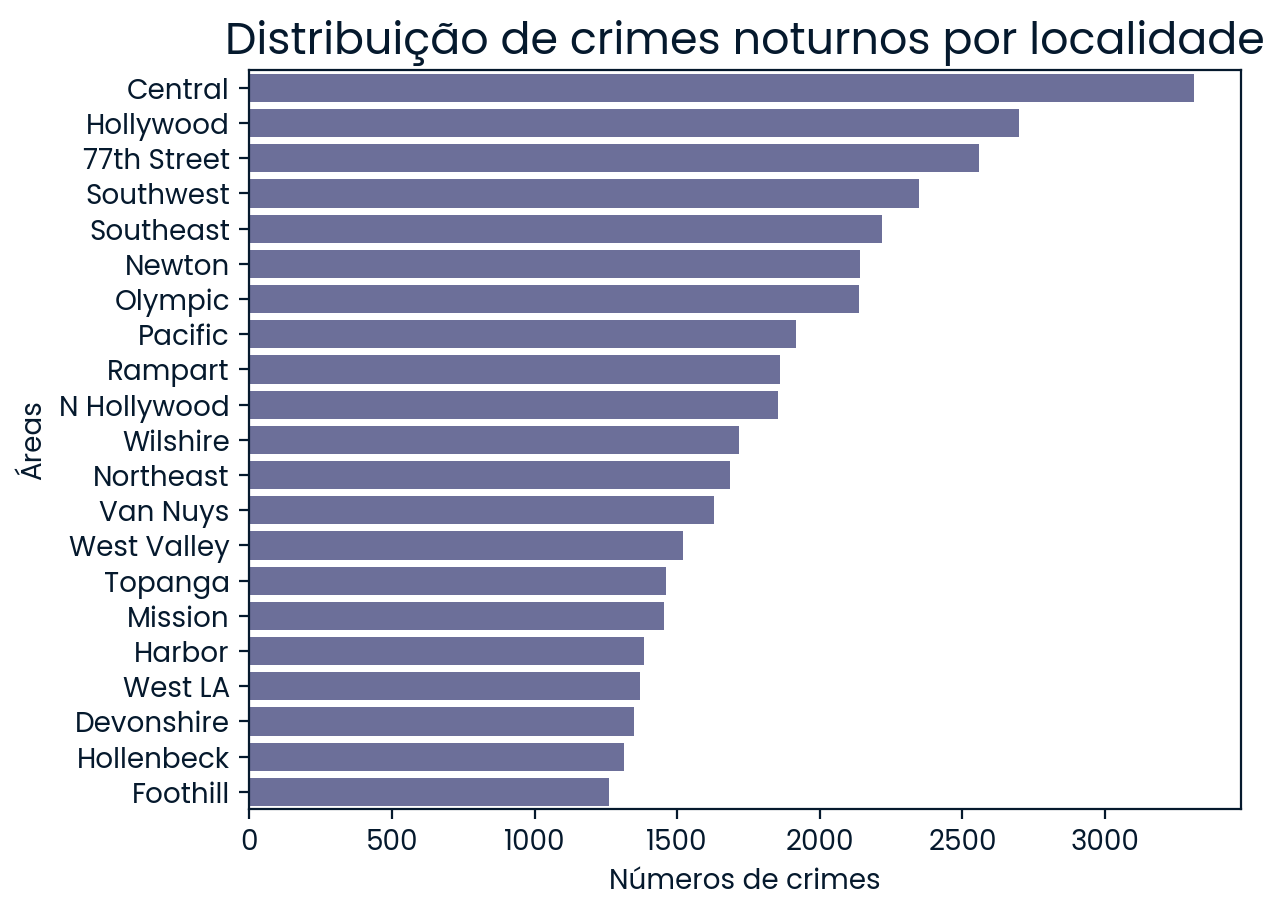

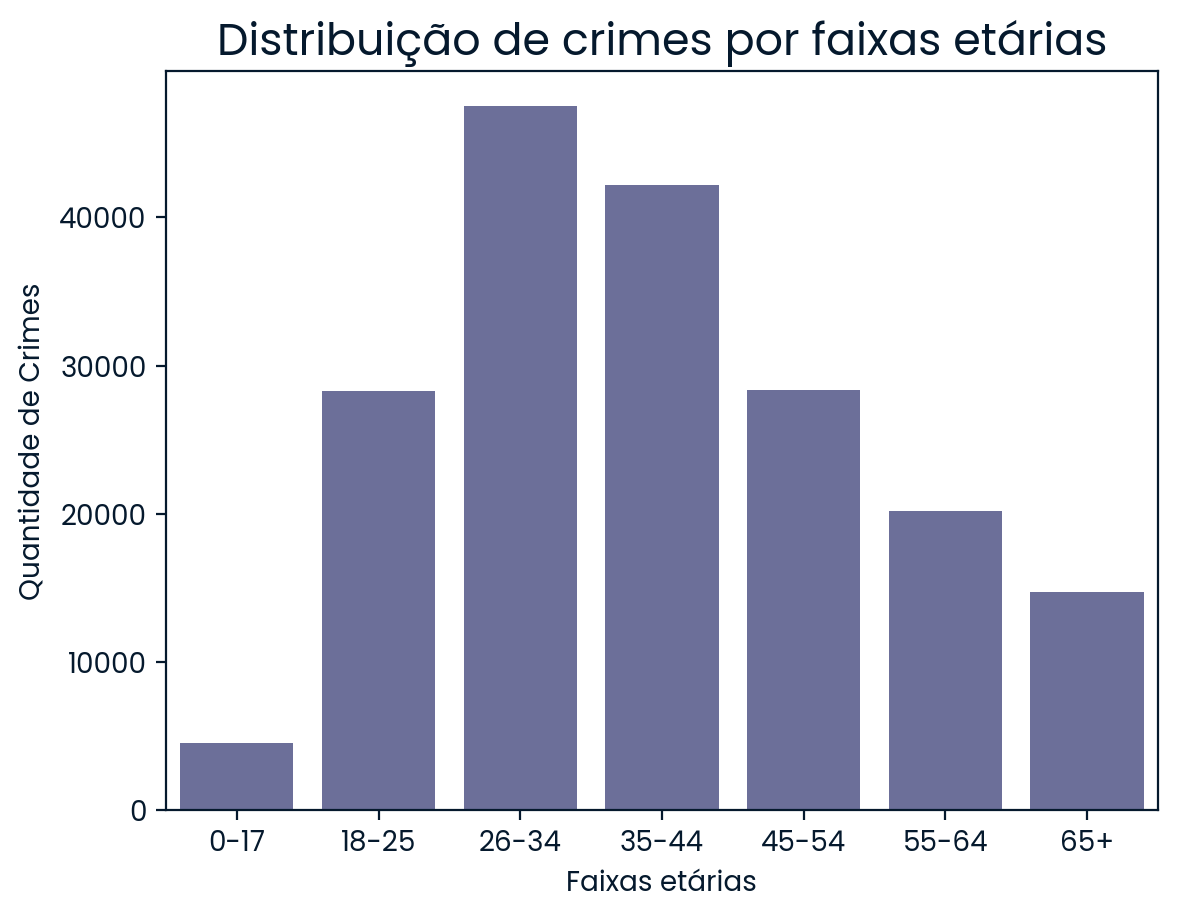

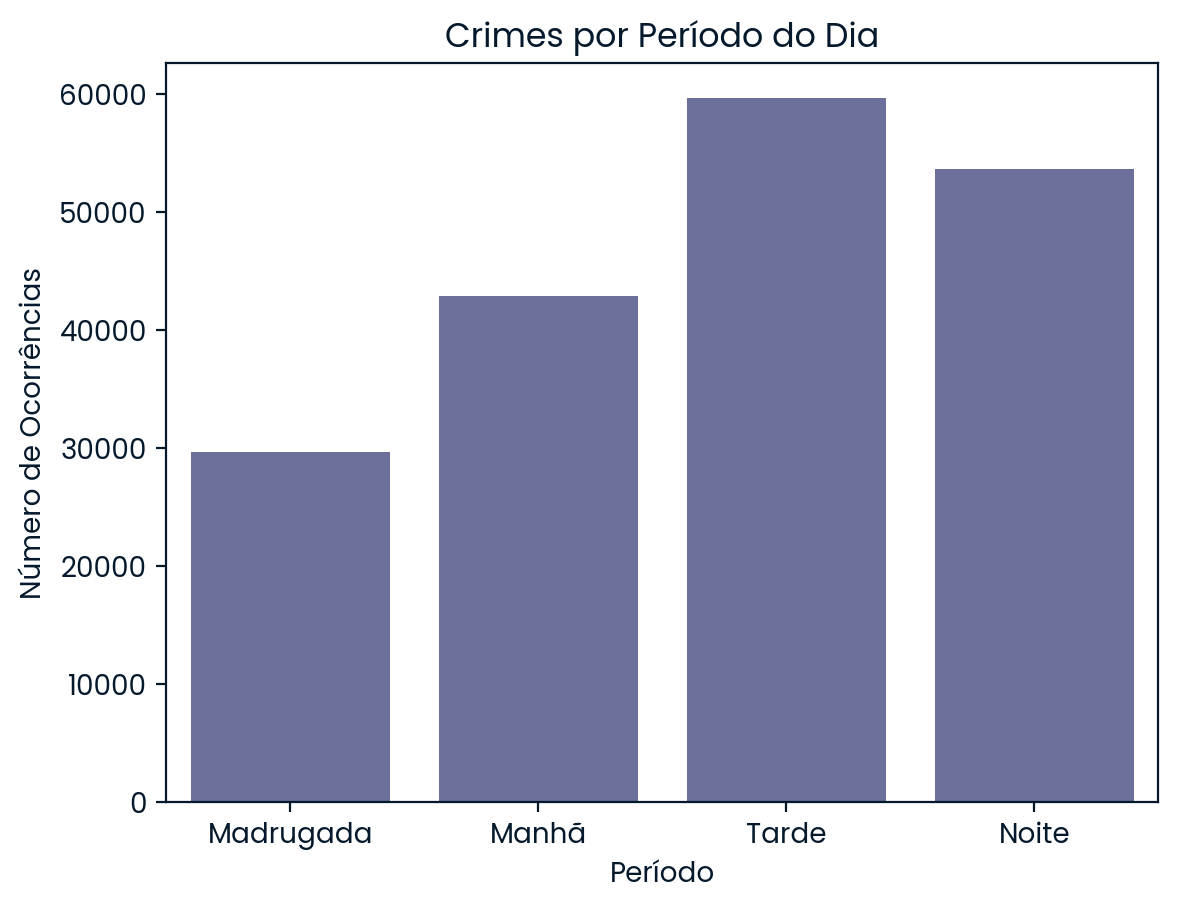

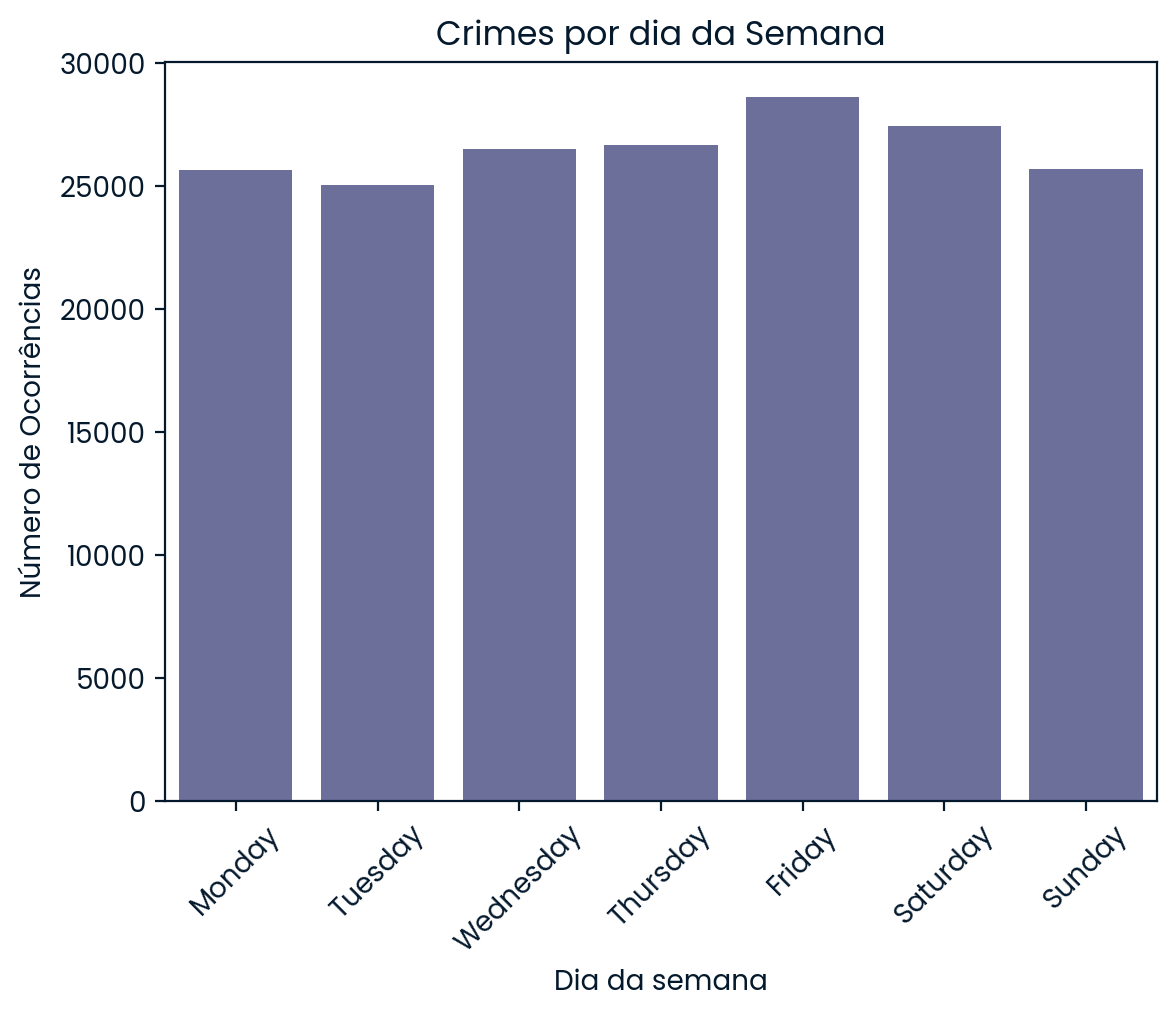

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})

# Horário com maior frenquêcia de crimes
crimes['hour_occ'] = crimes['TIME OCC'].str[0:2].astype(int) # criando coluna de horas
count_of_hours = crimes['hour_occ'].value_counts()
peak_crime_hour = count_of_hours.idxmax()

# Gráfico de distribuição de crimes por hora
order_hours = sorted(crimes['hour_occ'].unique())
plot = sns.countplot(x='hour_occ', data=crimes, order=order_hours )
plt.title('Distribuição de Crimes por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Crimes')
plot.patches[peak_crime_hour].set_facecolor('red')
plt.show()

# Área apresenta a maior frequência de crimes noturnos
night_hours = [22, 23 , 0, 1, 2, 3]
night_crimes = crimes[crimes['hour_occ'].isin(night_hours)].copy()
count_night_crime_location = night_crimes['AREA NAME'].value_counts()
peak_night_crime_location = count_night_crime_location.idxmax()

# Gráfico de distribuição de crimes noturnos por localidade 
sns.barplot(x=count_night_crime_location.values, y=count_night_crime_location.index)
plt.title('Distribuição de crimes noturnos por localidade', fontsize=16)
plt.xlabel('Números de crimes')
plt.ylabel('Áreas')
plt.show()

# Identificando o número de crimes cometidos contra vítimas de diferentes faixas etárias
bins = [0, 17, 25, 34, 44, 54, 64, 120] 
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"] # definindo as faixas etárias
crimes['age_group']= pd.cut(crimes['Vict Age'], bins=bins, labels=labels, include_lowest=True)
victim_ages = crimes['age_group'].value_counts()

# Gráfico distribuição de crimes por faixas etárias
order_ages = sorted(crimes['age_group'].unique())
sns.countplot(x='age_group', data=crimes, order=order_ages )
plt.title('Distribuição de crimes por faixas etárias', fontsize=16)
plt.xlabel('Faixas etárias')
plt.ylabel('Quantidade de Crimes')
plt.show()

# Crimes por período do dia
def classify_period(hour):
    if 6 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 18:
        return 'Tarde'
    elif 18 <= hour < 24:
        return 'Noite'
    else:
        return 'Madrugada'

crimes['period'] = crimes['hour_occ'].apply(classify_period)
crimes['period'].value_counts()

# Gráfico de distribuição de crimes por período do dia
order_period = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
sns.countplot(x='period', data=crimes, order=order_period)
plt.title("Crimes por Período do Dia")
plt.xlabel("Período")
plt.ylabel("Número de Ocorrências")
plt.show()

# Criando a coluna dos dias da semana
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['weekday'] = crimes['DATE OCC'].dt.day_name()

# Gráfico de distribuição de crimes por dia da semana
order_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='weekday', data=crimes, order=order_week)
plt.xticks(rotation=45)
plt.title("Crimes por dia da Semana")
plt.xlabel("Dia da semana")
plt.ylabel("Número de Ocorrências")
plt.show()



## Conclusão

A análise revelou padrões temporais claros na criminalidade de Los Angeles, com maior concentração de ocorrências em horários e períodos específicos do dia.

Os dados indicam uma anomalia no intervalo entre 12h e 13h, evidenciando a necessidade de uma análise mais detalhada.

Esses insights podem apoiar decisões relacionadas à alocação de efetivo policial, planejamento de rondas e ações preventivas em períodos críticos.